In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 8
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 2960 		 0.31 		 0.33 |
| 405 		 0.28 		 0.1 |
| 2618 		 0.2 		 0.24 |
| 2238 		 0.05 		 0.2 |
| 2384 		 0.35 		 0.16 |
| 3598 		 0.25 		 0.25 |
| 1244 		 0.05 		 0.05 |
| 3616 		 0.09 		 0.03 |
| 909 		 0.59 		 0.24 |
| 4922 		 0.14 		 0.39 |
| 3692 		 0.16 		 0.23 |
| 1984 		 0.17 		 0.13 |
| 24 		 0.09 		 0.27 |
| 2455 		 0.09 		 0.36 |
| 1685 		 0.23 		 0.22 |
| 2319 		 0.26 		 0.21 |
| 3429 		 0.3 		 0.04 |
| 599 		 0.12 		 0.29 |
| 792 		 0.25 		 0.04 |
-------------------------------------
The s.d. of M is: 1464.0
The s.d. of E is: 0.13
The s.d. of I is: 0.13
-------------------------------------
The mean of M is: 2047
The mean of E is: 0.18
The mean of I is: 0.21
-------------------------------------
The population mean parameters entered were: 1000, 0.1, 0.1
The population s.d. parameters entered were: 2000, 0.2, 0.2


###################################

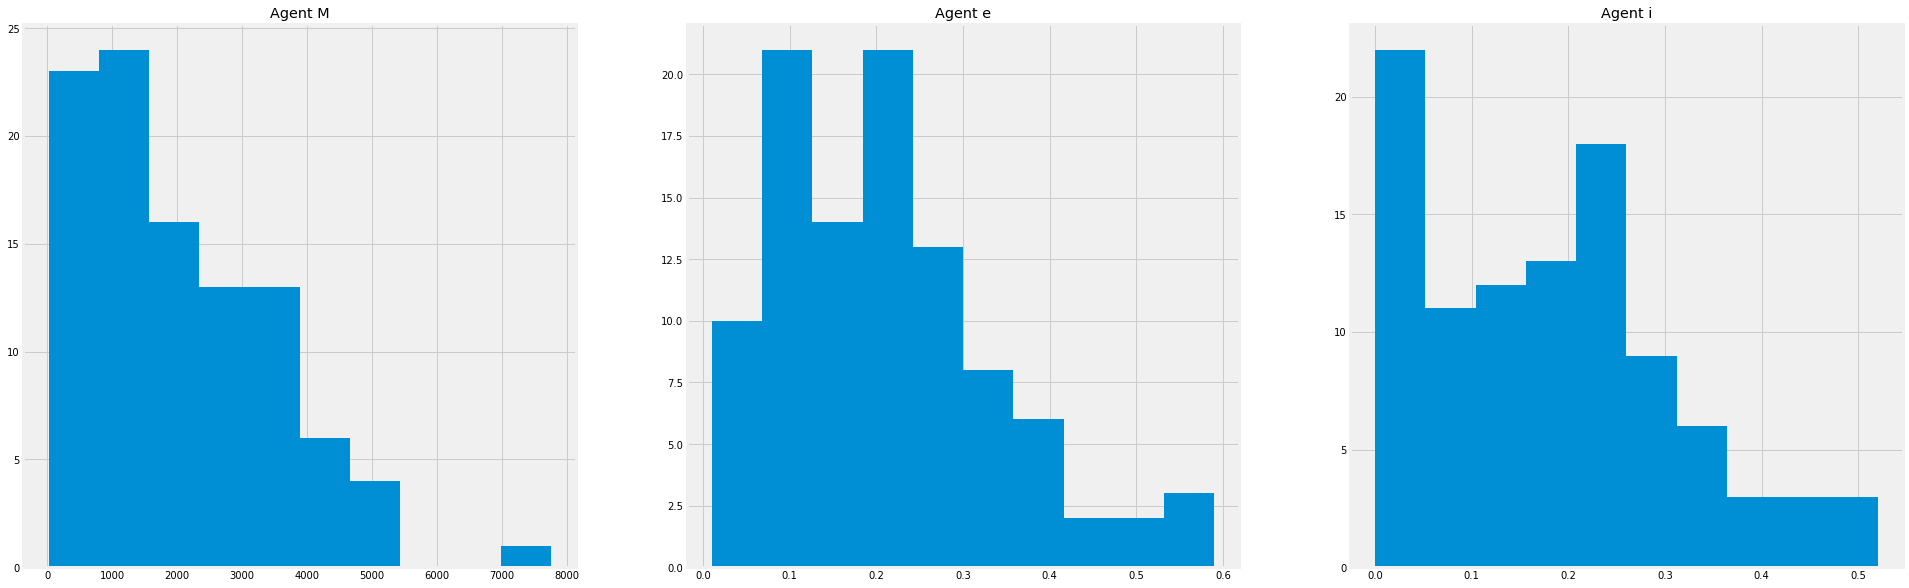

In [3]:
check_parameters(agents, M, E, I)

In [4]:
tournament_seed8_mm1000_me01_mi01_sdm2000_sde02_sdi02 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 101 minutes.


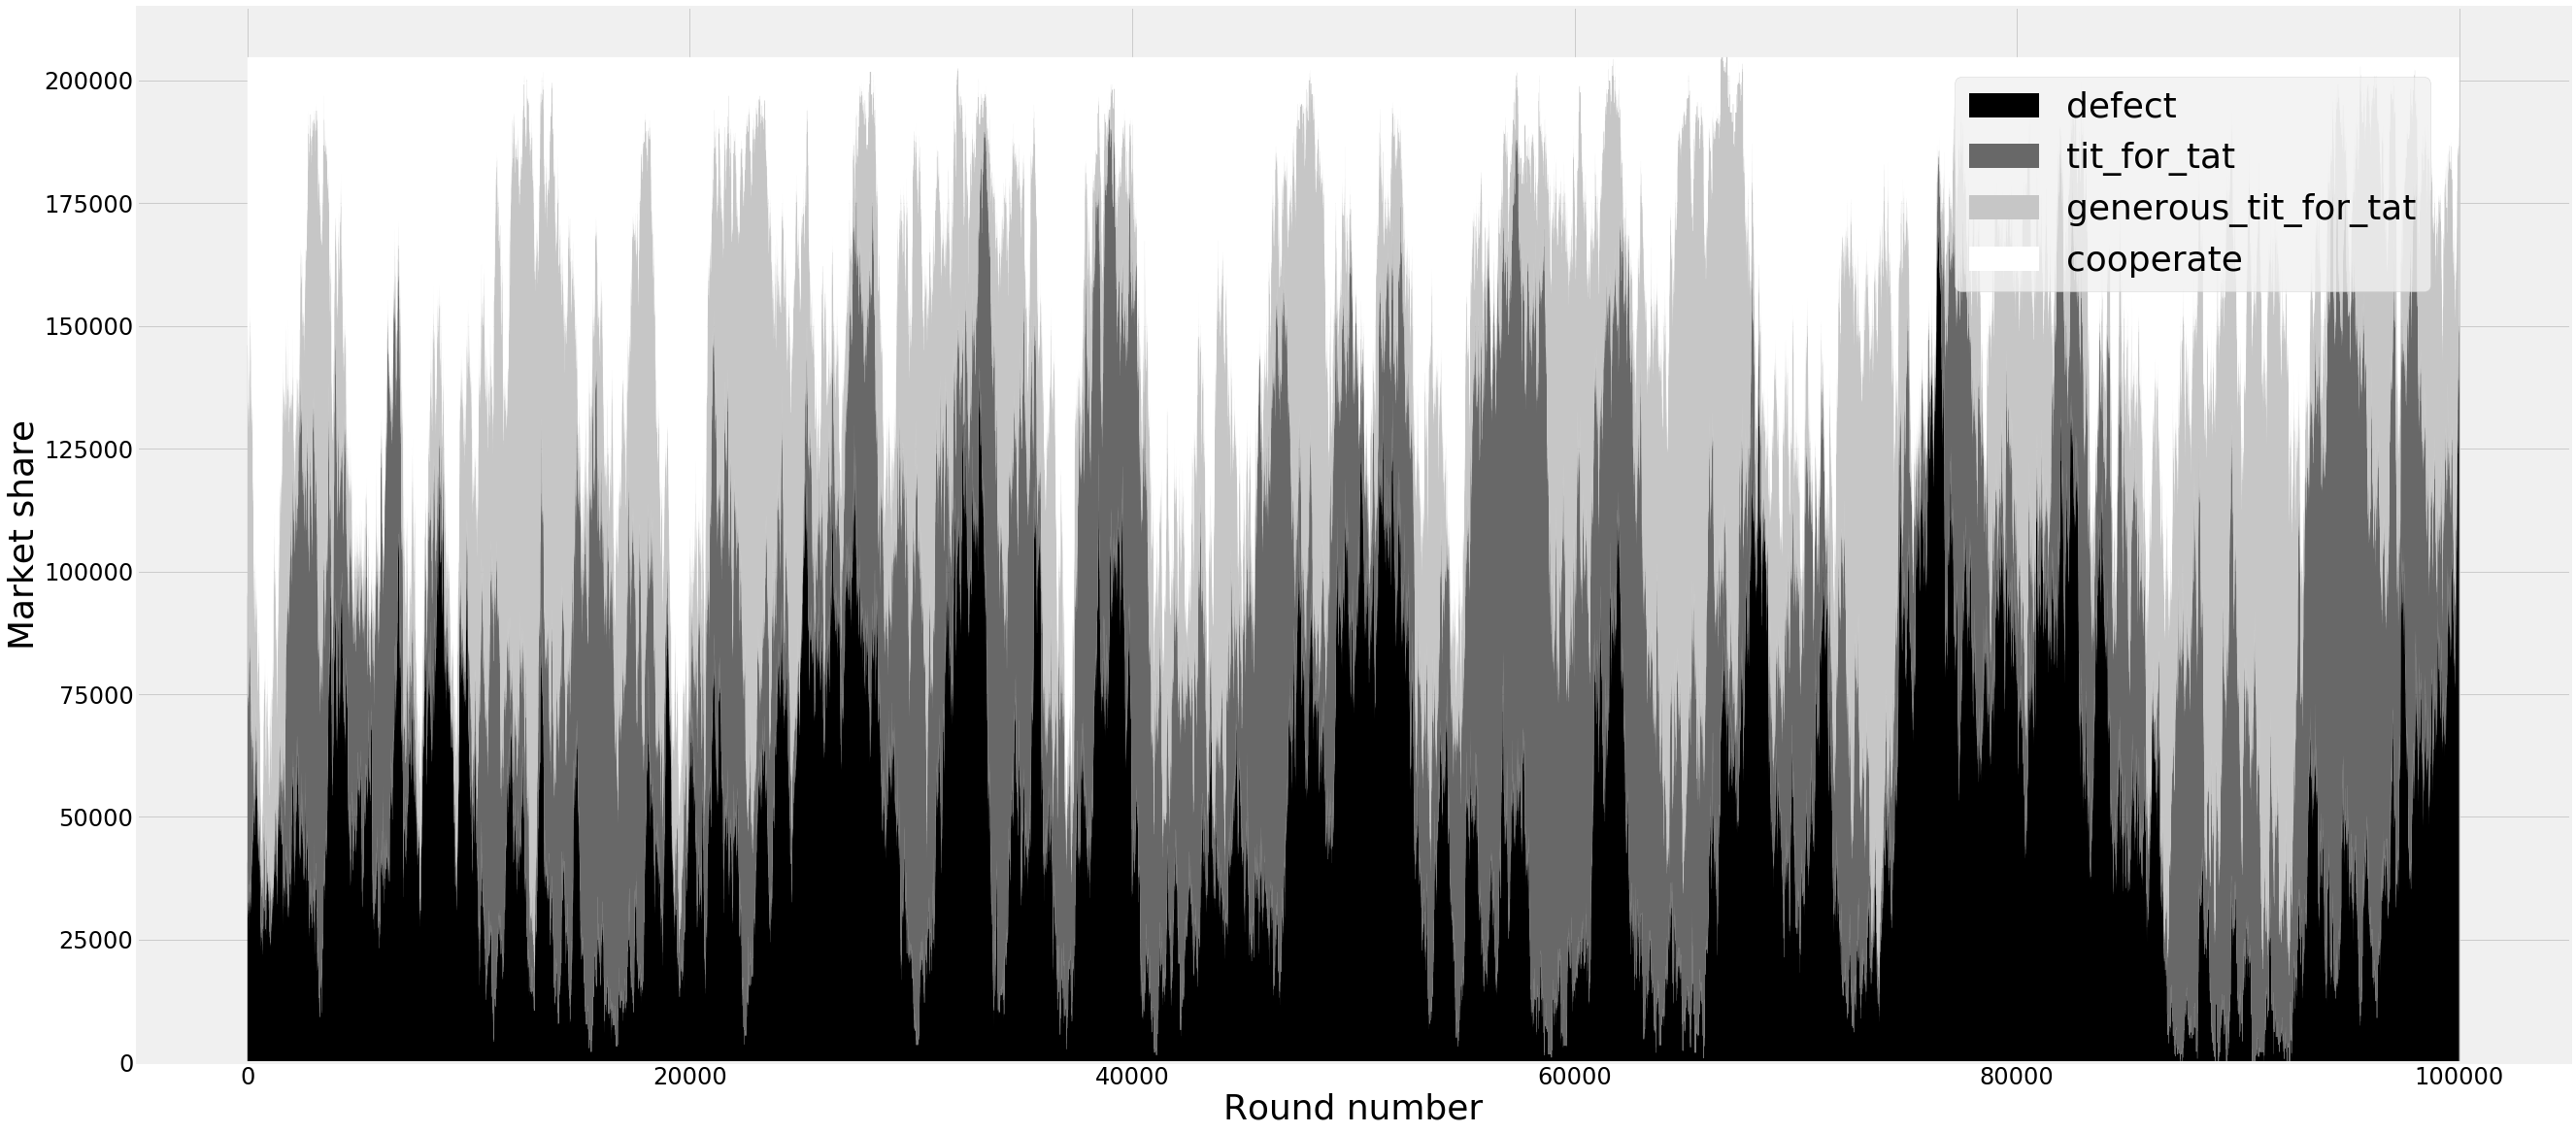

In [5]:
draw_stack(tournament_seed8_mm1000_me01_mi01_sdm2000_sde02_sdi02)

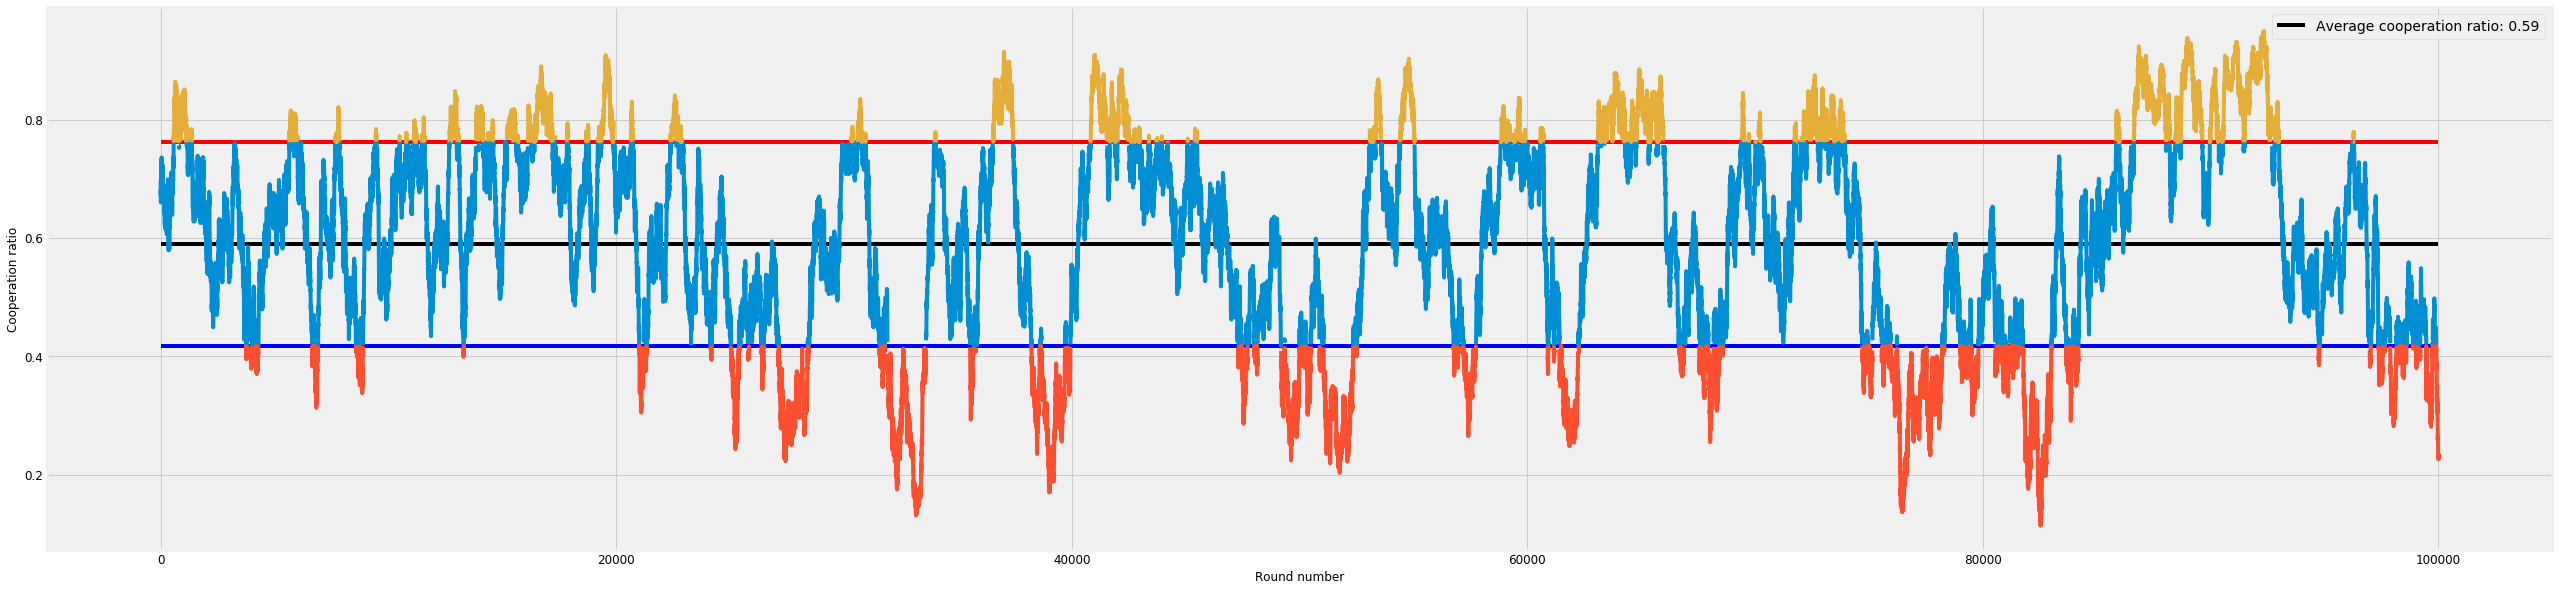

In [6]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed8_mm1000_me01_mi01_sdm2000_sde02_sdi02, constant = 1)

In [7]:
outliers = count_outliers(tournament_seed8_mm1000_me01_mi01_sdm2000_sde02_sdi02, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_seed8_mm1000_me01_mi01_sdm2000_sde02_sdi02.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5     730
1    0.6     774
2    0.7     781
3    0.8     714
4    0.9     720
5    1.0     708
6    1.1     613
7    1.2     540
8    1.3     435
9    1.4     425
10   1.5     297
11   1.6     322
12   1.7     233
13   1.8     192
14   1.9     136
15   2.0      81
16   2.1      44
17   2.2      48
18   2.3      21
19   2.4      28
20   2.5      17
21   2.6       9
22   2.7       6
23   2.8       0
24   2.9       0
25   3.0       0


In [8]:
save_cooperate_csv(tournament_seed8_mm1000_me01_mi01_sdm2000_sde02_sdi02, type_of_tournament= "tournament_seed8_mm1000_me01_mi01_sdm2000_sde02_sdi02", seed = str(seed))